In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("FyntraCustomerData.csv")
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Compute --Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.  Is there a correlation?

C:\Users\ruchika_garg01\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


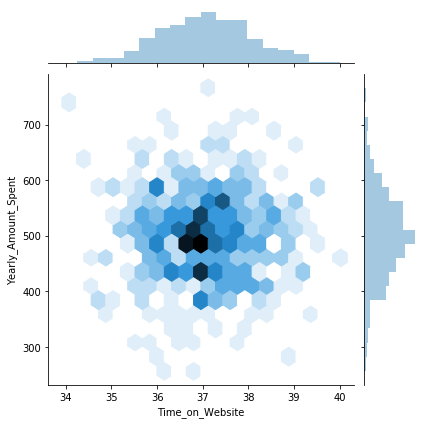

In [3]:
sns.jointplot(x="Time_on_Website", y="Yearly_Amount_Spent", data=df, kind="hex")
plt.show()

# Compute –Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1stOne?

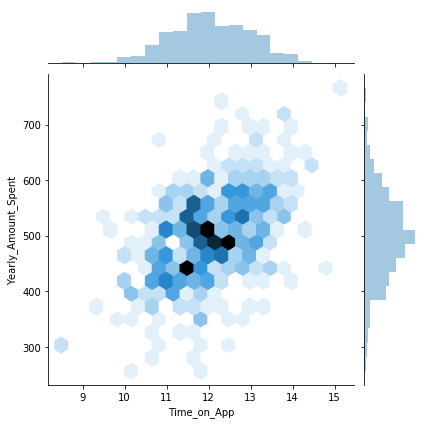

In [4]:
sns.jointplot(x="Time_on_App", y="Yearly_Amount_Spent", data=df, kind="hex")
plt.show()

Observation: As per my understanding, correlation between "Time on Website" and "Yearly Amount Spent" is greater than "Time on App" and "Yearly Amount Spent"

# Compute --Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

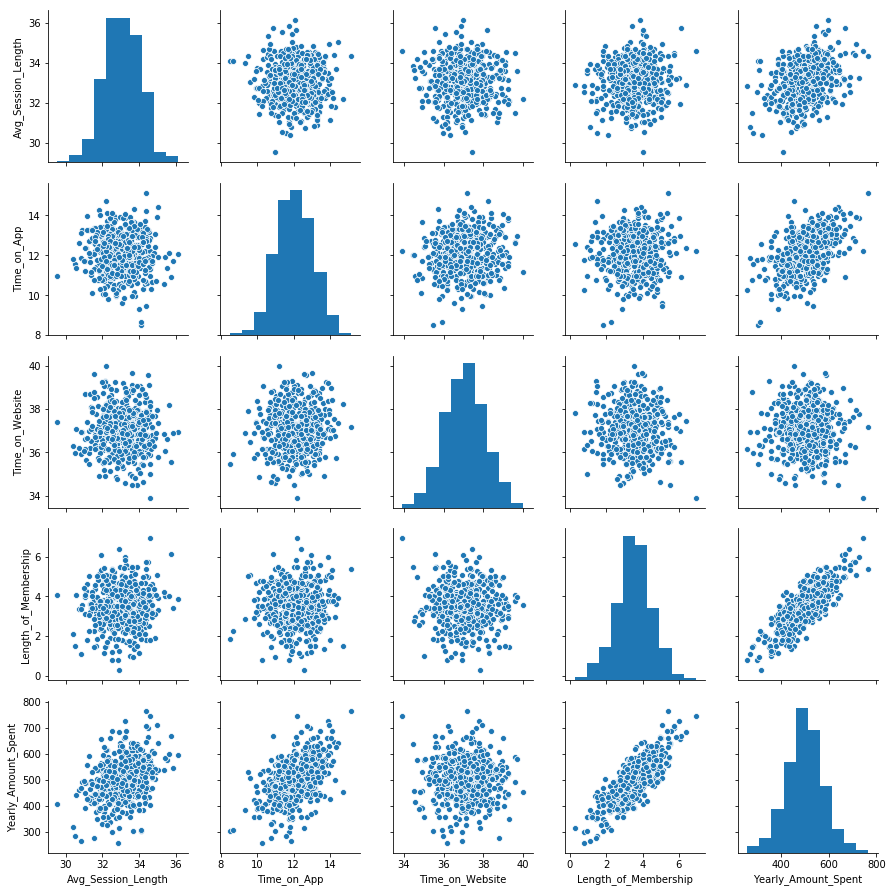

In [5]:
sns.pairplot(df)
plt.show()

# Compute –Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

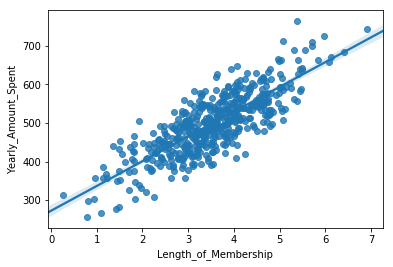

In [6]:
sns.regplot('Length_of_Membership','Yearly_Amount_Spent',df)

# Compute –Train and Test the data and answer multiple questions --What is the use of random_state=85?

In [ ]:
#train, test = train_test_split(df,test_size = 0.20,random_state=85)
#we can check the dimension of splitted data
#print(train.shape)
#print(test.shape)

#features = ['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']
#train_x = train[features]
#train_y = train.Yearly_Amount_Spent

#test_x = test[features]
#test_y =test.Yearly_Amount_Spent

#linear_reg = LinearRegression()
#linear_reg.fit(train_x,train_y)

#pred_y = linear_reg.

In [8]:
print(df.iloc[:,3:7].head())
train_x, test_x,train_y, test_y = train_test_split(df.iloc[:,3:7],df['Yearly_Amount_Spent'],test_size = 0.20,random_state=85)
print(train_x.shape)
print(train_y.shape)
linear_reg = LinearRegression()
model = linear_reg.fit(train_x,train_y)


   Avg_Session_Length  Time_on_App  Time_on_Website  Length_of_Membership
0           34.497268    12.655651        39.577668              4.082621
1           31.926272    11.109461        37.268959              2.664034
2           33.000915    11.330278        37.110597              4.104543
3           34.305557    13.717514        36.721283              3.120179
4           33.330673    12.795189        37.536653              4.446308
(400, 4)
(400,)


Specifying random state will help in selecting same set for training set everytime.

# Compute –Predict the data and do a scatter plot. Check if actual and predicted data match?

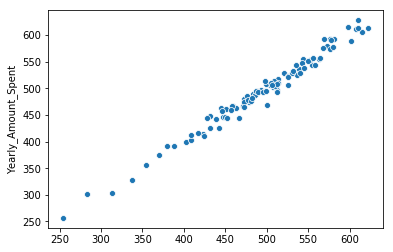

In [9]:
pred_y = linear_reg.predict(test_x)
#print(pred_y)
sns.scatterplot(pred_y,test_y)

# What is the value of Root Mean Squared Error?

In [12]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_y, pred_y))

95.03600581432431


# Final Question –Based on coefficients interpret company should focus more on their mobile app or on their website

In [13]:
linear_reg.coef_

array([25.94725163, 39.06682064,  0.68253009, 61.33469418])